# Economics 320 Lab : Nothing but Net

### Allahdad Shujrah | Muassar Raja | Krish Jogani | Dhruv Goswamy

In [54]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

## TABLE OF CONTENTS 

* [Introduction & Motivation](#anchor1)
* [Data](#anchor2)
* [Methodology and Emperical Model](#anchor3)
* [Regression Analysis](#anchor4)
* [Graphical Illustrations](#anchor5)
* [Conclusion](#anchor6)

In [42]:
from pandas_profiling import ProfileReport
import scipy.stats as stats
from IPython.core.display import HTML
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
from scipy.optimize import minimize
from datetime import datetime
!pip install plotly
import plotly as plty
from stargazer.stargazer import Stargazer
!pip install pywaffle
from pywaffle import Waffle
import plotly.graph_objects as go
%matplotlib inline

## INTRODUCTION & MOTIVATION <a class = anchor id = anchor1></a>

The first thing athletes are taught in team sports is that there is no “I” in team. However, we beg to differ. In this research paper, we will talk about one of the most intense team sports in the world - Basketball. We will look at how each player, playing in their respective positions, hold great responsibility in their team winning in one of the most competitive basketball leagues in the world which is the NBA. In our research, we will attempt to answer the question, “How does the position in which a player play contribute in scoring points for their teams per game?”. This question may sound easy with a simple enough answer, “Just shoot and score”. However, going back to my initial point of how team sports are played, there are a lot of variables that go into scoring points each game. So, we will try to understand these variables for individual players and how they score points each game to eventually help their team win. There is an “I” in win, but which position is the most crucial to helping the team win?

In [49]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(url= "https://cdn.nba.com/manage/2021/07/franceusa8-2048x1152.jpg")

## DATA <a class = anchor id = anchor2></a>

The data we are using is a comprehensive breakdown of individual player statistics from the 2018-19 NBA regular season. The population of the study is players from all 30 NBA teams in contention for a playoff spot in 2018-19. The data describes crucial statistics such as the number of minutes a player plays per game on average, the 3pt % of a player, the defensive tendencies of the player (blocks,steals,rebounds) etc. All of these variables discussed above play a part in affecting our dependent variable which is average points scored per game. The data contains the records of 708 players in the NBA which is vital as this means that we can obtain valuable insights. 

Data Used:
KOBSAR, Stefanie, & BOSCH, Jordi. (2020). NBA STATS [Data set]. Zenodo. https://doi.org/10.5281/zenodo.4264803

In [4]:
nba1819 = pd.read_csv('~Muassar/Desktop/Academics/Emory Fall21/Econ 320 LAB/Final/nba_stats.csv')

### Data Cleaning

In [5]:
# Cleaning for each positions: C, PG, PF, CF, SG

C = nba1819[nba1819["Pos"] == "C"]
PG = nba1819[nba1819["Pos"] == "PG"]
PF = nba1819[nba1819["Pos"] == "PF"]
SF = nba1819[nba1819["Pos"] == "SF"]
SG = nba1819[nba1819["Pos"] == "SG"]


In [6]:
# Renaming the variables to something more suitable and clean

nba1819.rename(columns={'FT%':'FTPercent'}, inplace=True)
nba1819.rename(columns={'2P%':'twoPP'}, inplace=True)
nba1819.rename(columns={'3P%':'threePP'}, inplace=True)

# Here, we only keep the variables we want

nba1819_updated = nba1819[['Pos', 'FTPercent','twoPP','threePP', 'ORB', 'MP', 'PTS']]

# And to summarize it all, we used pandas profiling to give a brief overview on how the data is strucured

profile = ProfileReport(nba1819_updated, title="Pandas Profiling Report")
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

### Variable Table

To understand our data better, down below we have listed the variable names we will deal with in this report and what they mean. This should help you grasp the idea we are putting forward much better.


| Variable Shorthand  | Variable Definition                                                |
|---------------------|--------------------------------------------------------------------|
| PPG                 | Points Scored per game                                             |
| PPG                 | Points Scored per game                                             |
| twoPP               | The number of 2pt shots made by the Number of 2pt shots attempted  |
| threePP             | The number of 3pt shots made by the number of 3pt shots attempted  |
| ORB                 | Number of Offensive rebounds per game                              |
| FTPercent           | Number of free throws made by the number of free throws attempted  |
| MPG                 | Minutes played per game                                            |
| PG                  | Point Gaurd                                                        |
| SG                  | Shooting Gaurd                                                     |
| SF                  | Small Forward                                                      |
| PF                  | Power Forward                                                      |
| C                   | Centre                                                             |

## METHODOLOGY & EMPIRICAL MODEL <a class = anchor id = anchor3></a>

The model attempts to find how different aspects of an individual's game affects their output, which in this model is their points per game! The variables chosen to explain points per game are chosen as follows: 

X1 = 2 point % - The total number of 2pt attempts scored divided by the number of 2pt shots attempted.

X2 = 3 point % - The number of 3pt shots made divided by the number of 3pt shots taken.

X3 = Free throw % - Number of free throws made divided by total free throws taken.

X4 = Offensive rebounds - Number of times ball was rebounded by an offensive player of the other teams backboard.

X5 = Minutes played per game 

The dependent variable in this model is

Y = Points per game 

We get the Multilinear Regression Function: 

                    y = β0 + β1X1 + β2X2 + β3X3 + β4X4 + β5X5 + u


The Beta values represent the change in Points per game for a player for a unit change in that specific variable (assuming all else is equal). The u represents the uncertainty within the model. 


In [7]:
# Here, we regress our independent variables to PTS which is Points Per Game and we do this for players in each position

m1 = smf.ols('PTS ~ twoPP + threePP + FTPercent + ORB + MP', data = nba1819, subset = (nba1819['Pos'] == 'PF')).fit()
#m1.summary()

m2 = smf.ols('PTS ~ twoPP + threePP + FTPercent  + ORB + MP', data = nba1819, subset = (nba1819['Pos'] == 'PG')).fit()
#m2.summary()

m3 = smf.ols('PTS ~ twoPP + threePP + FTPercent  + ORB + MP', data = nba1819, subset = (nba1819['Pos'] == 'C')).fit()
#m3.summary() 

m4 = smf.ols('PTS ~ twoPP + threePP + FTPercent + ORB + MP', data = nba1819, subset = (nba1819['Pos'] == 'SG')).fit()
#m4.summary()

m5 = smf.ols('PTS ~ twoPP + threePP + FTPercent + ORB + MP', data = nba1819, subset = (nba1819['Pos'] == 'SF')).fit()
#m5.summary()

# Regressing without subsetting for each position

m6 = smf.ols('PTS ~ twoPP + threePP + FTPercent + ORB + MP', data = nba1819).fit()
#m6.summary()

In [8]:
# Our results summarized

st=Stargazer([m1,m2,m3,m4,m5,m6])
from IPython.core.display import HTML
st.title('Regression Data for Points Per Game by Position')
st.custom_columns(['PF Position', 'PG Position', 'C Position', 'SG Position', 'SF Position', 'All Positions'], [1,1,1,1,1,1])
HTML(st.render_html())

## REGRESSION ANALYSIS <a class = anchor id = anchor4></a>

According to the regression table above, we see that Points per game (dependent variable) are determined by all our independent variables with some variables being more significant than others. As seen in the 6th regression which is the aggregate regression for players in all positions, we see that all the independent variables are highly significant as their p-value is less than 0.01 except for ‘threePP’ which refers to a player's three-point percentage. 

Now, diving into the analysis in terms of each position ‘FTPercent’ is the most significant for centers (3).  MP (minutes played) is the most significant determinant for points per game across all positions, this can be inferred because all the values have three stars which means that the p-value is less than 0.01 for each position. ’ORB’ is significant for power forwards, centers, and shooting guards with p-values less than 0.05. ‘threePP’ is the least significant determinant for points per game although it is moderately significant for the center position as the p-value is less than 0.05. Although ‘twoPP’ is highly significant across all positions it does not show a high significance level for any position because of the high variance present in the data. 

We can say with confidence that the determinants we chose are significant in predicting points per game for any player playing in any position on the basketball court since the R^2 is high.

## GRAPHICAL ILLUSTRATIONS <a class = anchor id = anchor5></a>

### Position Distribution 

*First, let us look at how the different positions occupy the population. This will give us a better understanding on the data we are dealing with*

C:\Users\Muassar\anaconda3\lib\site-packages\pywaffle\waffle.py:394: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  self.ax = self.add_subplot(loc, aspect="equal")


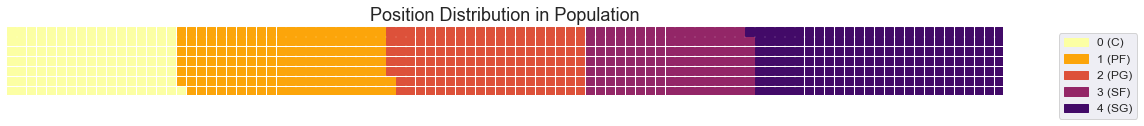

In [43]:
#First let's assign a variable to include the positions we are concerned with

nba1819_2 = nba1819[nba1819['Pos'].isin(['C','SF','PG','SG','PF'])]

df = nba1819_2.groupby('Pos').size().reset_index(name='counts')
n_categories = df.shape[0]
colors = [plt.cm.inferno_r(i/float(n_categories)) for i in range(n_categories)]


fig = plt.figure(
    FigureClass=Waffle,
    plots={
        '111': {
            'values': df['counts'],
            'labels': ["{0} ({1})".format(n[0], n[1]) for n in df[['Pos', 'counts']].itertuples()],
            'legend': {'loc': 'upper left', 'bbox_to_anchor': (1.05, 1), 'fontsize': 12},
            'title': {'label': 'Position Distribution in Population', 'loc': 'center', 'fontsize':18}
        },
    },
    rows=7,
    colors=colors,
    figsize=(16, 9)
)


**There seems to be almost an even distribution among the 5 different positions over the population which is good for the analysis as it will deminish any bias that may result if the population were to be skewed over one position over the others**

### Position vs Points Per Game

*Through this graph, we will be able to see the average of the total points scored by players in each of the relevent positions. A barplot will allow us to understand which positioned players have the most involvement when it comes to scoring in each game*

Text(0.5, 1.0, 'Position vs Points Per Game')

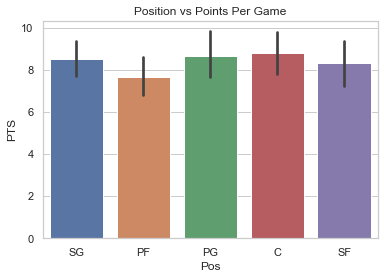

In [44]:
nba1819_2 = nba1819[nba1819['Pos'].isin(['C','SF','PG','SG','PF'])]

sns.set_theme(style="whitegrid")
PPG_Pos = sns.barplot(x="Pos", y="PTS", data=nba1819_2)
plt.title('Position vs Points Per Game')


**From the graph above, we can see that Centers (C) have the highest average PPG of all positions in the NBA. Centers tend to stay close to the basket for easy points therefore this is a fair result. Power forwards have the least average points per game with Small forwards being around the league average points per game**

### Offensive Rebounds vs Points Per Game

*This graph will show us the relationship between Offensive Rebounds (ORB) and the total Points Per Game (PTS). Through this we can try to understand the correlation that exists between these two*

Text(0.5, 1.0, 'Rebounds vs Points Per Game')

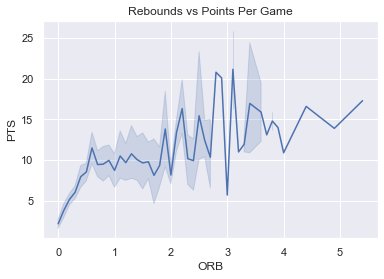

In [52]:
sns.set_theme(style="darkgrid")
PPG_Pos = sns.lineplot(x="ORB", y="PTS", data=nba1819)
plt.title('Rebounds vs Points Per Game')


**The graph of Offensive Rebounds (ORB) vs Points Per Game (PTS) shows us that the two variables are positively correlated in a way that a line of best fit will be linear. Therefore we can infer more the offensive rebounds, higher points per game. This is confirmed by the fact that on average, a centre scores the most points per game in the NBA. There however exists a discrepancy at 3 where PTS drops. This can be explained as PF usually get around 3 offensive rebounds per game and as seen in a previous chart, Power Forwards have the lowest average PPG of any NBA position.**

### 3 Point Percentage vs Points Per Game

*When talking about points per game, we have to mention 3 Point Percentage (threePP) since we know that it directly contributes to points. But what percentage of 3 point shots actually make it to contribute to the points per game?*

<AxesSubplot:xlabel='threePP', ylabel='PTS'>

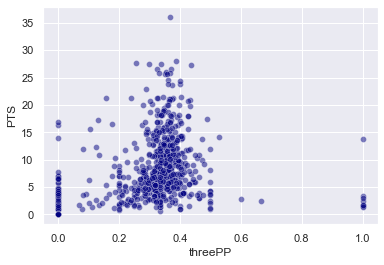

In [46]:
sns.scatterplot(x="threePP", y="PTS", alpha=0.5, color="navy", data=nba1819)

**The 3pt% vs PPG graph shows a high density area of points at around 37-40% which happens to be around the league average 3pt%. We can interpret this graph as players who shoot more efficiently (40%) from the 3pt line are expected to have a higher average PPG, holding minutes played per game constant.**

### 2 Point Percentage vs Points Per Game

*Just like the previous graph, we have to mention 2 Point Percentage (twoPP) as well. Let us look at what percentage of 2 point shots actually make it to contribute to the points per game*

<AxesSubplot:xlabel='twoPP', ylabel='PTS'>

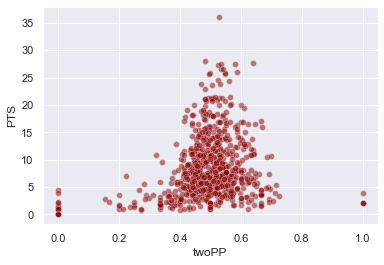

In [47]:
sns.scatterplot(x="twoPP", y="PTS", alpha=0.5, color="darkred", data=nba1819)

**The 2pt% vs PPG graph above shows us that most players in the NBA shoot between 40-60% from all 2pt shots taken. The data points away from this league average are correlated with lower PPG average. The data points revolving around this league average for 2pt% show us that someone shooting efficiently (around 50%) is expected to have a higher PPG, holding Minutes played per game constant.**

### Game Time vs Points Per Game

*One very interesting graph would be the relation that exists between Minutes Played and Points Per Game. Through this graph, we can build a correlation that exists with higher game time for players and their ultimate success in scoring* 

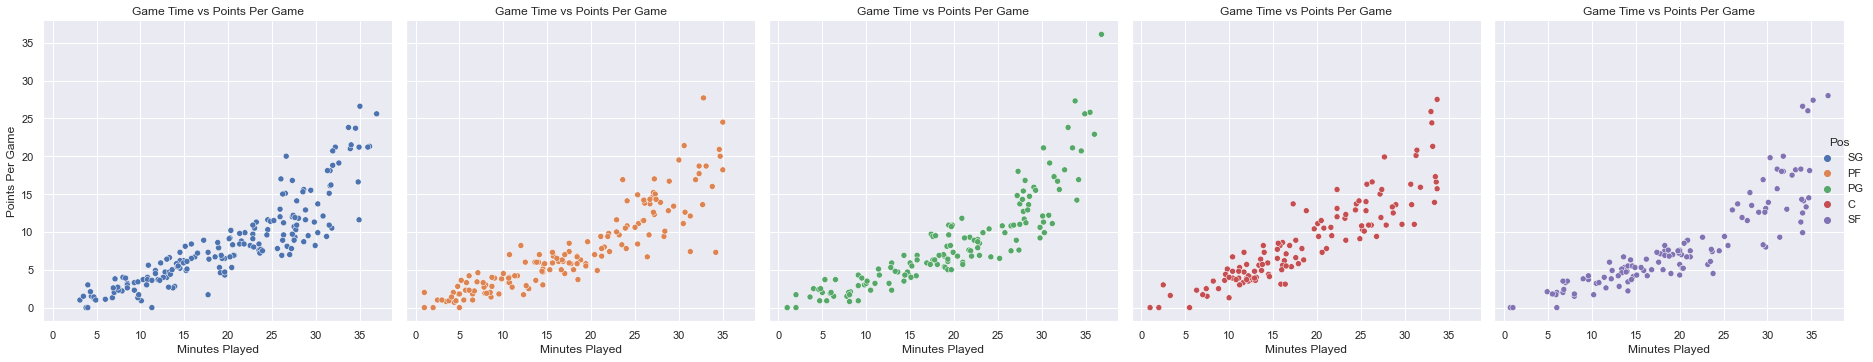

In [48]:
sns.relplot(x="MP", 
            y="PTS", 
            hue="Pos",
            col='Pos',
            data=nba1819_2).set(title ="Game Time vs Points Per Game", 
                                      xlabel = "Minutes Played", 
                                      ylabel =  "Points Per Game").add_legend();

#### Correlation Table (MP vs PTS)

In [15]:
# Correlation table
table1 = nba1819_2.groupby('Pos')[['MP', 'PTS']].corr()
table1.dropna()

MP       PTS
Pos                        
C   MP   1.000000  0.894304
    PTS  0.894304  1.000000
PF  MP   1.000000  0.889234
    PTS  0.889234  1.000000
PG  MP   1.000000  0.867879
    PTS  0.867879  1.000000
SF  MP   1.000000  0.867681
    PTS  0.867681  1.000000
SG  MP   1.000000  0.878582
    PTS  0.878582  1.000000

**For all 5 positions, we see an initial linear relationship between Minutes Played and Points per Game until around the 30th minute of play. After the 30th minute of play, we see our relationship becoming exponential in nature.
This is an expected relationship as more minutes played in a game means the player in question has more time to score points. The exponential increase after the 30th minute can be explained due to only the star players in a team playing more than 30 minutes a game; it is the star players who get the most points per game for a team.**


## CONCLUSION <a class = anchor id = anchor6></a>

Finally, after regressing our model and showing multple graphs and tables, what have we found? From the regression model we found that, unsurprisingly, some of our independent variables did contribute more towards Points Per Game than others. 3-Point Percentage and 2-Point Percentage are two very strongly correlated variables to the Points Per Game and since basketball is played around the premise of scoring 2-pointers and 3-pointers, we were not astounded with these results. However, what was interesting is analyzing the other variables that played a part into scoring more points per game. There are other characteristic variables or "abilities" that may play into our model such as determination, aggression, fitness, or even perhaps mentality, which would make our model even more interesting and very insightful.

Initially, we thought that Shooting Guards (*SG*) would be the highest contributers to the Points Per Game (*PTS*), but we were shocked to see that Centers (*C*) beat them into being more efficient. From the table showing the correlation between Minutes PLayed and Points Per Game, we see that given the minutes, centers can definitely outplay every other position. 

To conclude, we would like to state that we were successful in analyzing the determinants that affect points per game (dependent variable) for basketball players. The method we used could be used by analysts to help players focus on aspects of their game that would yield the highest points per game for them, and thus increase their impact on a match. The regression output we got was highly significant for most determinants at the 0.01 significance level with determinants having a different significance level based on the player’s position.   

**To end our report, we would like to sign off with the MVP of the 2018-19 season, Giannis Antetokounmpo (PF/C).**

In [53]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(url = "https://i1.wp.com/www.bleachersnews.com/wp-content/uploads/2019/06/Giannis_MVP.jpg?resize=768%2C432&ssl=1")